In [92]:
!pip install Sastrawi

In [93]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("scrapped_data_shope.csv")
df

,userName,score,at,content
0,Pengguna Google,5,2025-04-21 18:17:04,lebih mudah dan amanah
1,Pengguna Google,2,2025-04-21 18:14:58,chat kepenjual banyak yang tidak bisa ditampil...
2,Pengguna Google,2,2025-04-21 18:12:04,opsional
3,Pengguna Google,5,2025-04-21 18:11:17,banyak
4,Pengguna Google,5,2025-04-21 18:06:54,Bagus
...,...,...,...,...
9995,Arif M.,1,2025-04-15 04:18:43,aplikasi tidak responsif lemot
9996,Ana Ana,5,2025-04-15 04:18:15,nganter barang nya lama padalah sudah menuju a...
9997,Supardi S.paijan,5,2025-04-15 04:17:26,mantap
9998,Dian Puspa ria,5,2025-04-15 04:15:09,terimakasih shoppee...sukses slalu...


In [95]:
print(df.columns)


Index(['userName', 'score', 'at', 'content'], dtype='object')


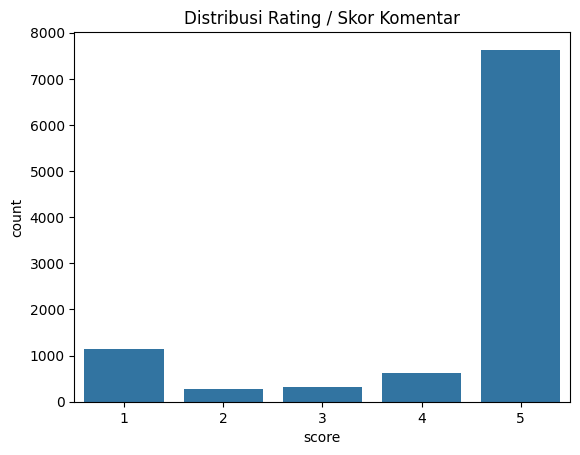

In [96]:
sns.countplot(data=df, x='score')
plt.title("Distribusi Rating / Skor Komentar")
plt.show()

In [97]:
def label_sentiment(score):
    if score >= 4:
        return 'positif'
    elif score == 3:
        return 'netral'
    else:
        return 'negatif'

df['label'] = df['score'].apply(label_sentiment)

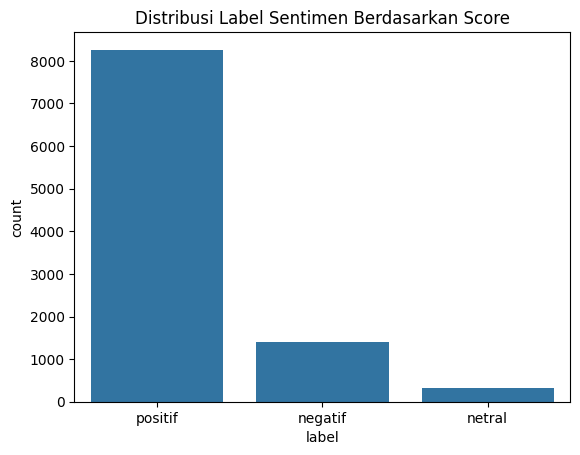

In [99]:
sns.countplot(data=df, x='label')
plt.title("Distribusi Label Sentimen Berdasarkan Score")
plt.show()

In [100]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory_stopwords = StopWordRemoverFactory()
stopwords = factory_stopwords.get_stop_words()

factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

def remove_stopwords_stem(text):
    words = text.split()
    filtered = [word for word in words if word not in stopwords]
    filtered_text = ' '.join(filtered)
    stemmed_text = stemmer.stem(filtered_text)
    return stemmed_text


In [101]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [102]:
df['cleaned'] = df['content'].astype(str)

In [103]:
vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['cleaned'])
y = df['label']

In [104]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [106]:
# Evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8880

Classification Report:
              precision    recall  f1-score   support

     negatif       0.69      0.59      0.64       277
      netral       0.00      0.00      0.00        68
     positif       0.91      0.97      0.94      1655

    accuracy                           0.89      2000
   macro avg       0.54      0.52      0.53      2000
weighted avg       0.85      0.89      0.87      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
